In [1]:
import os
os.chdir("/Users/victorcarre/Code/Base de donnée biostimulants/bio4safe-scraper")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/bio4safe_cleaned.csv" , sep=";")

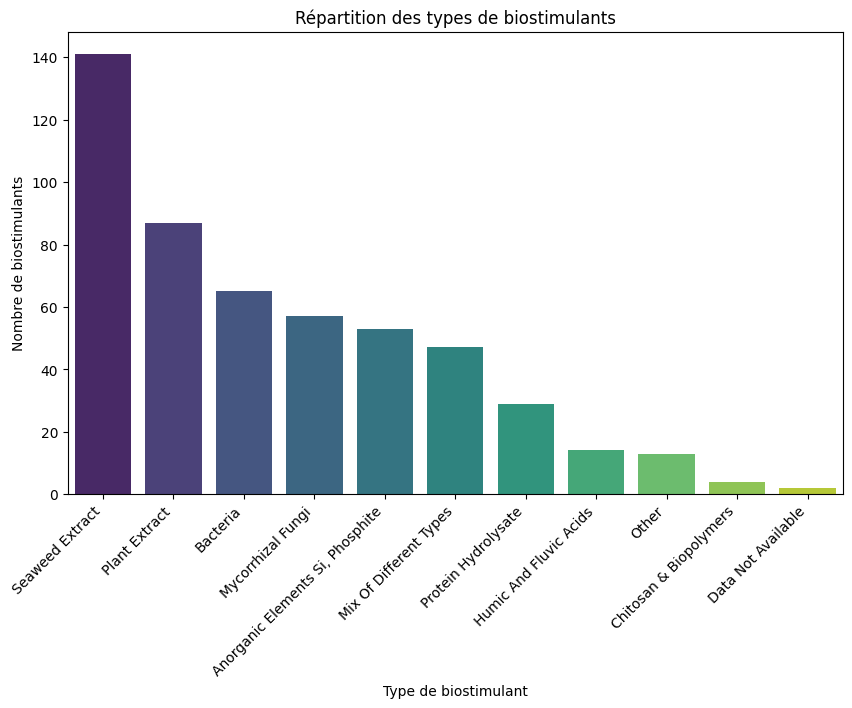

In [4]:
# Compter les occurrences des types de biostimulants et créer un DataFrame temporaire pour faciliter la gestion des couleurs
type_counts = data['type'].value_counts()
type_df = pd.DataFrame({
    'type': type_counts.index,
    'count': type_counts.values
})

# Créer une visualisation en barres

plt.figure(figsize=(10, 6))
sns.barplot(data=type_df, x='type', y='count', hue='type', palette='viridis', dodge=False)
plt.title('Répartition des types de biostimulants')
plt.xlabel('Type de biostimulant')
plt.ylabel('Nombre de biostimulants')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  # Désactiver la légende
plt.show()



/var/folders/g5/gfzgn6710bl4fnkqby736jyh0000gn/T/ipykernel_83858/3572696233.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=effect_df, x='effect', y='count', palette='Blues_d')
/var/folders/g5/gfzgn6710bl4fnkqby736jyh0000gn/T/ipykernel_83858/3572696233.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_title("Effet")


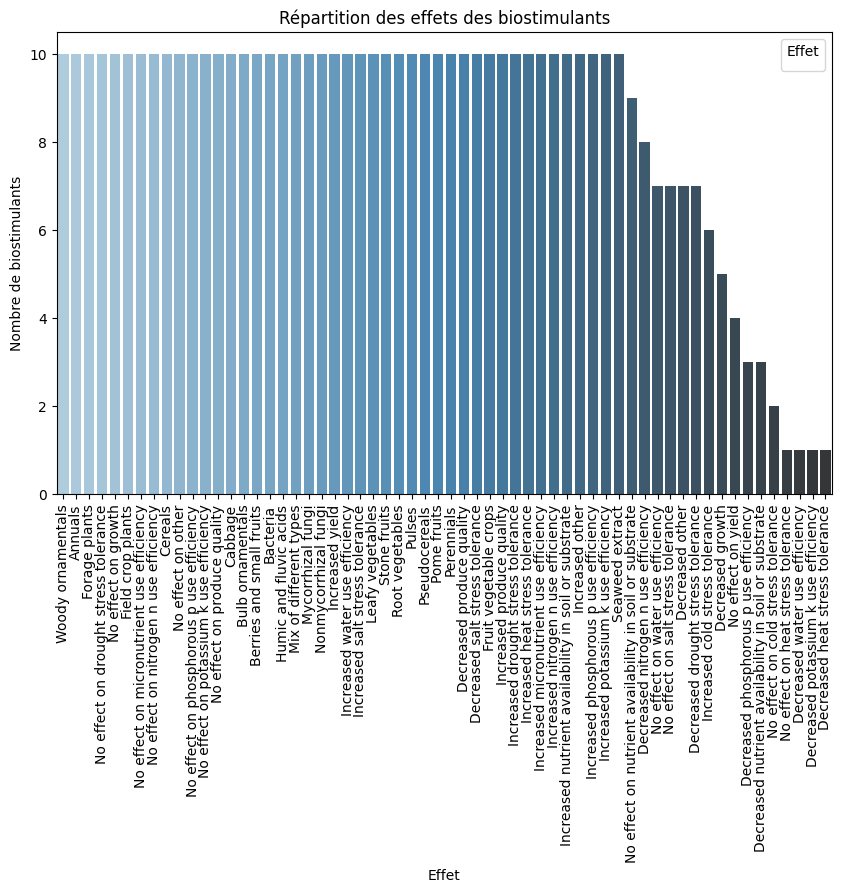

In [5]:
# Compter les occurrences des effets
effect_counts = data['effect'].value_counts()

# Transformer en DataFrame pour seaborn
effect_df = effect_counts.reset_index()
effect_df.columns = ['effect', 'count']

# Créer une visualisation en barres
plt.figure(figsize=(10, 6))
sns.barplot(data=effect_df, x='effect', y='count', palette='Blues_d')
plt.title('Répartition des effets des biostimulants')
plt.xlabel('Effet')
plt.ylabel('Nombre de biostimulants')
plt.xticks(rotation=90)
plt.legend().set_title("Effet")
plt.show()


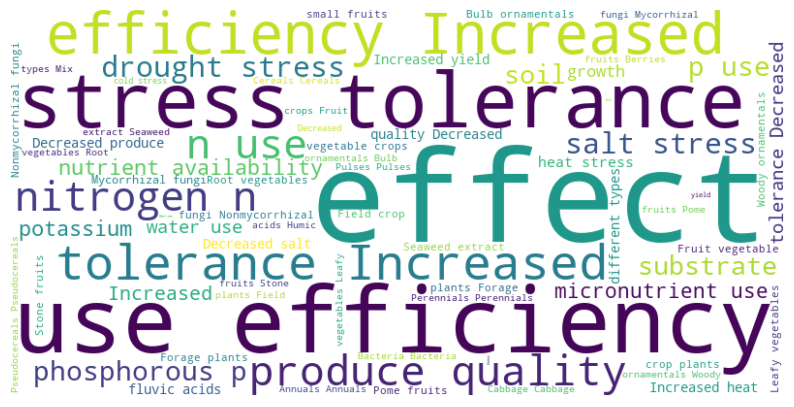

In [6]:
from wordcloud import WordCloud

# Créer un nuage de mots à partir des effets
text = ' '.join(data['effect'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactiver les axes
plt.show()


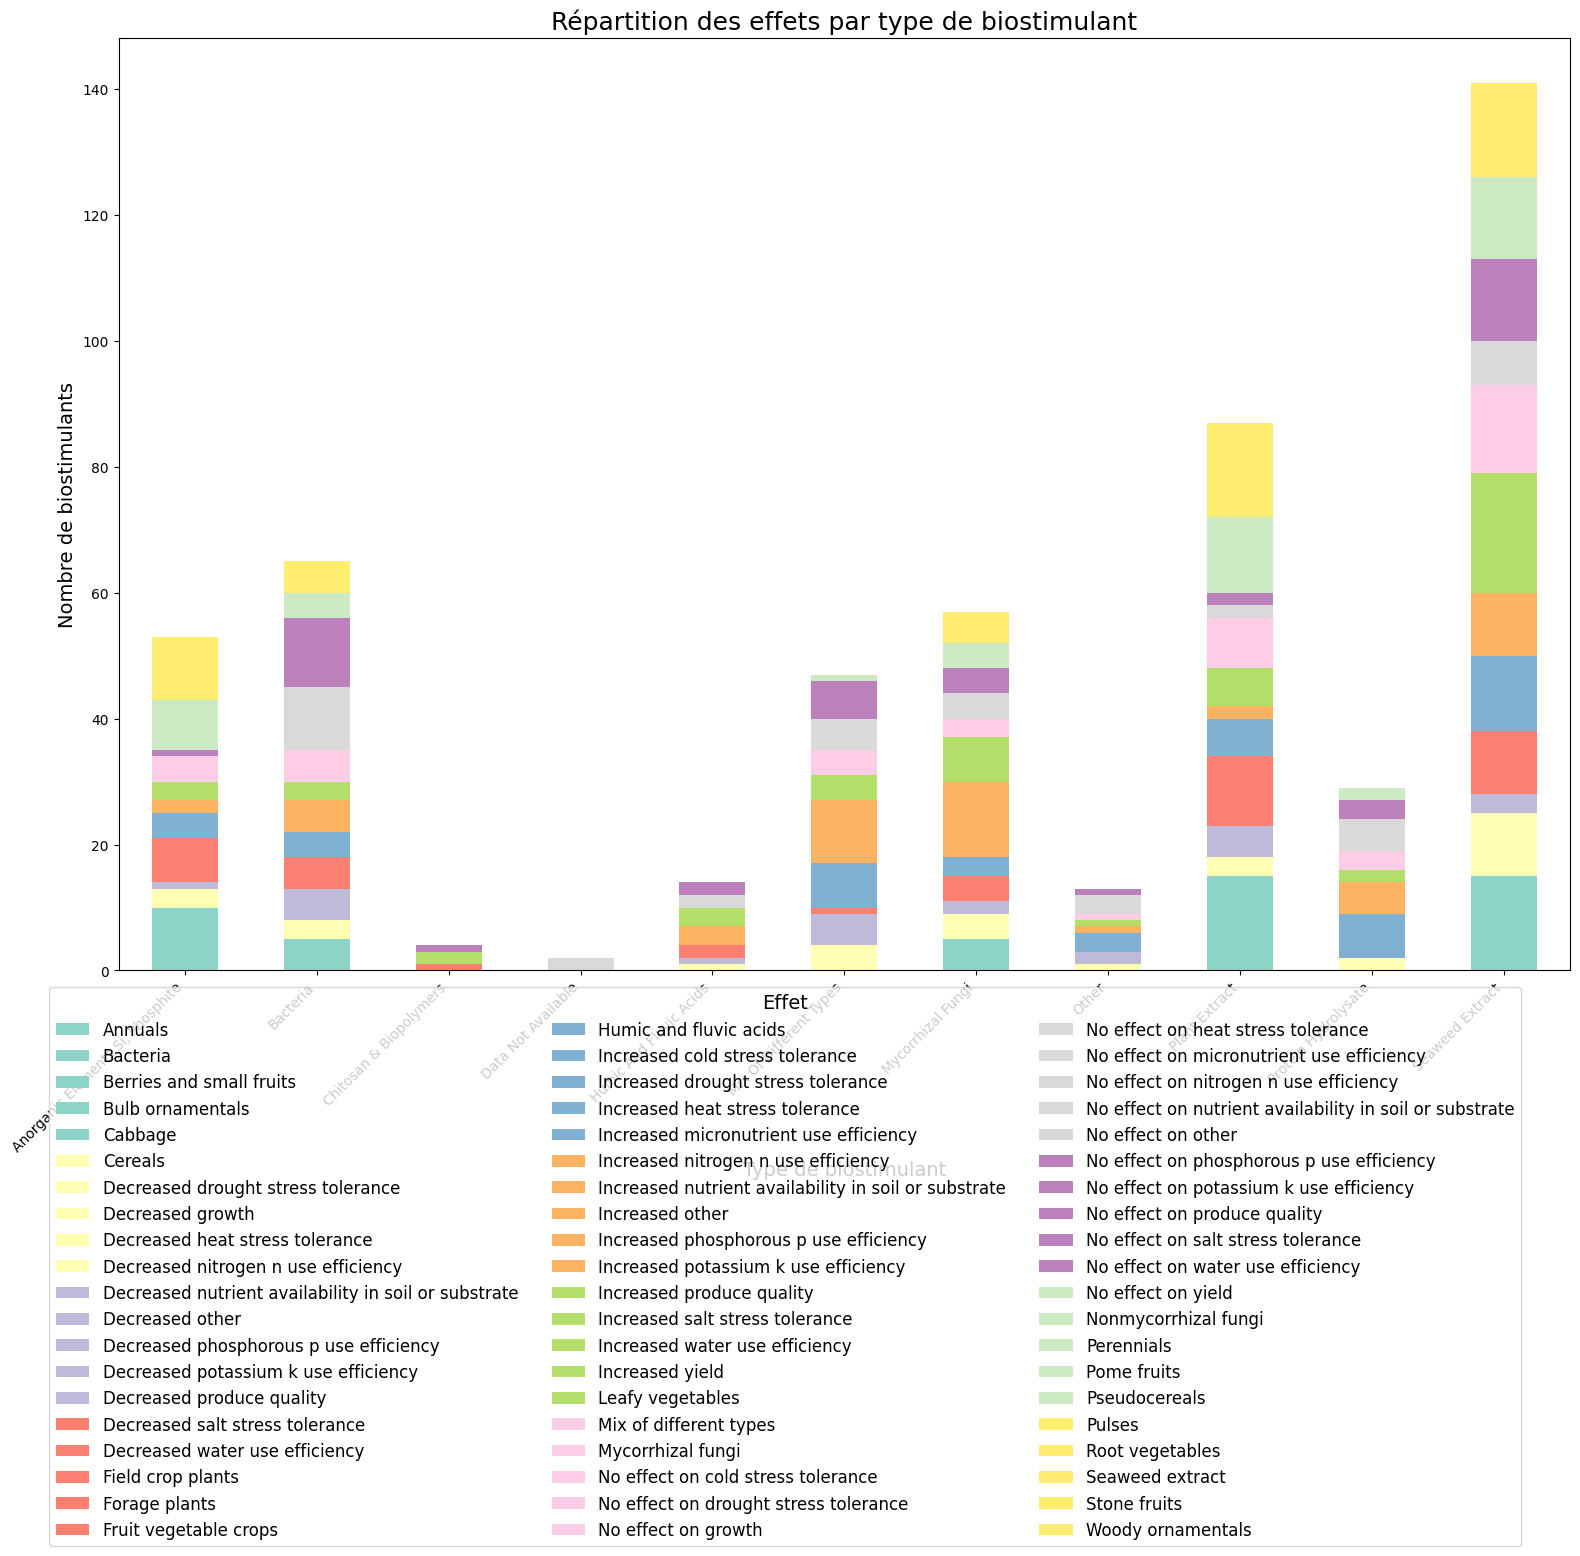

In [8]:
# Créer un tableau de contingence pour les types et les effets
contingency_table = pd.crosstab(data['type'], data['effect'])

# Créer un graphique en barres empilées
fig, ax = plt.subplots(figsize=(16, 12))
contingency_table.plot(kind='bar', stacked=True, legend=False, colormap='Set3', ax=ax)

# Ajouter les titres et labels
ax.set_title('Répartition des effets par type de biostimulant', fontsize=18)
ax.set_xlabel('Type de biostimulant', fontsize=14)
ax.set_ylabel('Nombre de biostimulants', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Placer la légende en dessous, en deux colonnes
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, title='Effet', fontsize=12, title_fontsize=14)

# Ajustement des marges
plt.tight_layout()
plt.show()



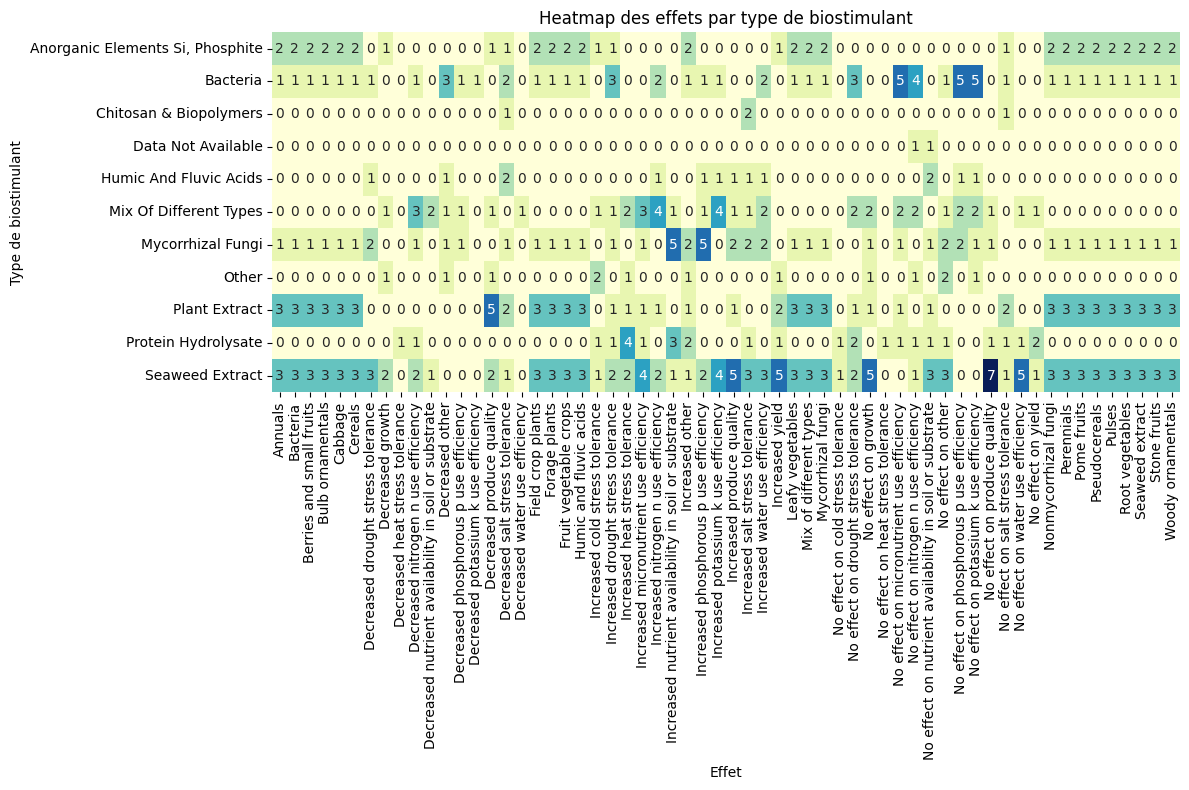

In [9]:
# Créer un tableau de contingence pour les types et les effets
contingency_table = pd.crosstab(data['type'], data['effect'])

# Créer une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Heatmap des effets par type de biostimulant')
plt.xlabel('Effet')
plt.ylabel('Type de biostimulant')
plt.tight_layout()
plt.show()


/var/folders/g5/gfzgn6710bl4fnkqby736jyh0000gn/T/ipykernel_83858/2298001301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_biostimulants.index, y=top_5_biostimulants.values, palette='RdBu')


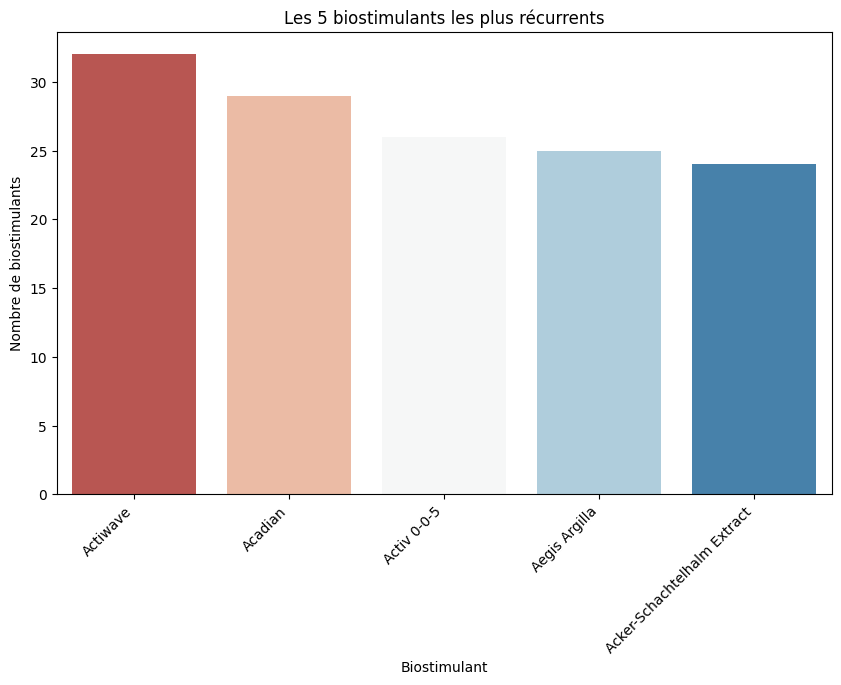

In [17]:
# Compter les occurrences des biostimulants
biostimulant_counts = data['biostimulant'].value_counts()

# Extraire les 5 biostimulants les plus fréquents
top_5_biostimulants = biostimulant_counts.head(5)

# Créer une visualisation en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_biostimulants.index, y=top_5_biostimulants.values, palette='RdBu')
plt.title('Les 5 biostimulants les plus récurrents')
plt.xlabel('Biostimulant')
plt.ylabel('Nombre de biostimulants')
plt.xticks(rotation=45, ha='right')
plt.show()


In [26]:
# Calculer la proportion des effets pour un type donné (par exemple, 'Seaweed extract')
effect_proportions = data[data['type'] == 'seaweed extract']['effect'].value_counts(normalize=True)

# Vérifier les valeurs uniques dans la colonne 'type' (sans tenir compte de la casse et des espaces)
print(data['type'].str.strip().str.lower().unique())

# Vérifier que la série n'est pas vide
if not effect_proportions.empty:
    # Créer un graphique en secteurs
    plt.figure(figsize=(7, 7))
    effect_proportions.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', len(effect_proportions)))
    plt.title('Proportions des effets pour Seaweed extract')
    plt.ylabel('')
    plt.show()
else:
    print("Aucune donnée pour 'Seaweed extract'.")




['mycorrhizal fungi' 'seaweed extract' 'bacteria' 'humic and fluvic acids'
 'anorganic elements si, phosphite' 'mix of different types' 'other'
 'protein hydrolysate' 'plant extract' 'chitosan & biopolymers'
 'data not available']
Aucune donnée pour 'Seaweed extract'.
